In [1]:
#Import Dependencies & set Reference URL for Scrape
import pandas as pd
import geopandas as gp

worldview_url = 'https://rcdb.com/location.htm'

In [2]:
worldview_tables = pd.read_html(worldview_url)

In [3]:
#Scrape Worldview Table and save as a dataframe.
worldview = worldview_tables[1]
worldview.head()

,Location,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Dominican Republic,3,0.000515,10766998,0.278629,18627.997587,0.161048
1,Jamaica,2,0.000343,2890299,0.691970,4261.180756,0.469353
2,Guatemala,11,0.001888,16913503,0.650368,42296.835788,0.260067
3,Cuba,3,0.000515,11484636,0.261219,42872.359189,0.069975
4,Costa Rica,6,0.001030,4905769,1.223050,19842.543943,0.302381


In [4]:
#Rename the Location column for later merging with GeoJSON file
coasters = worldview.rename(columns = {'Location': 'ADMIN'}, inplace=False)

In [5]:
#Export to CSV to review data for cleaning
coasters.to_csv("CSVs/coasters.csv")

In [6]:
#Replace "-" with 0 for all values
coasters.replace({"-": 0}, inplace=True)
coasters

,ADMIN,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Dominican Republic,3,0.000515,10766998,0.278629,1.862800e+04,0.161048
1,Jamaica,2,0.000343,2890299,0.691970,4.261181e+03,0.469353
2,Guatemala,11,0.001888,16913503,0.650368,4.229684e+04,0.260067
3,Cuba,3,0.000515,11484636,0.261219,4.287236e+04,0.069975
4,Costa Rica,6,0.001030,4905769,1.223050,1.984254e+04,0.302381
...,...,...,...,...,...,...,...
171,Cape Verde,0,0,539560,0,1.585070e+03,0
172,SÃ£o TomÃ© and PrÃ­ncipe,0,0,199910,0,3.886657e+02,0
173,Comoros,0,0,850688,0,6.486728e+02,0
174,Australia,30,0.005148,24450561,1.226966,2.974432e+06,0.010086


In [13]:
#Clean up country names that transferred with typos & to match countries geoJSON
coasters.replace({"CuraÃ§ao": "Curaçao", "CÃ´te d'Ivoire": "Ivory Coast", 
                  "SÃ£o TomÃ© and PrÃ­ncipe": "Sao Tome and Principe",
                 "United States": "United States of America",
                 "Tanzania": "United Republic of Tanzania",
                 "Republic of the Congo": "Republic of Congo"}, inplace=True)
coasters

,ADMIN,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Dominican Republic,3,0.000515,10766998,0.278629,1.862800e+04,0.161048
1,Jamaica,2,0.000343,2890299,0.691970,4.261181e+03,0.469353
2,Guatemala,11,0.001888,16913503,0.650368,4.229684e+04,0.260067
3,Cuba,3,0.000515,11484636,0.261219,4.287236e+04,0.069975
4,Costa Rica,6,0.001030,4905769,1.223050,1.984254e+04,0.302381
...,...,...,...,...,...,...,...
171,Cape Verde,0,0,539560,0,1.585070e+03,0
172,Sao Tome and Principe,0,0,199910,0,3.886657e+02,0
173,Comoros,0,0,850688,0,6.486728e+02,0
174,Australia,30,0.005148,24450561,1.226966,2.974432e+06,0.010086


In [14]:
#Read in the Countries GeoJSON
countries = gp.read_file('geojsons/countries.geojson')

In [15]:
countries.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [16]:
#Merge the two dataframes to add roller coaster data to GeoJSON
coasters_and_countries = countries.merge(coasters, on='ADMIN')

In [19]:
coasters_and_countries.head()

,ADMIN,ISO_A3,geometry,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",1,0.000172,35530081,0.028145,248707.695316,0.004021
1,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",2,0.000343,29784193,0.067150,483544.314606,0.004136
2,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",1,0.000172,2930187,0.341275,11081.537910,0.090240
3,Andorra,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",2,0.000343,76965,25.985838,174.232555,11.478911
4,United Arab Emirates,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...",55,0.009439,9400145,5.850974,27555.464581,1.995974


<AxesSubplot:>

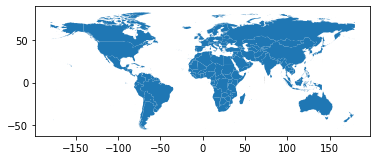

In [20]:
#Plot the above dataframe to confirm it retained GeoJSON format and all countries are represented. 
coasters_and_countries.plot()

In [21]:
#Create a GeoJSON of the worldview data 
coasters_and_countries.to_file("geojsons/worldview.geojson", driver='GeoJSON')